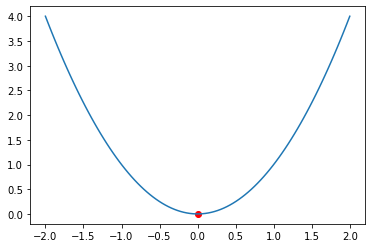

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = np.linspace(-2,2,100)
y = x**2
plt.plot(x,y)
plt.scatter(0,0,color='red')

In [6]:
def min_gradient(x_start, rate, n_iter, f,g):
    x = x_start
    for n in range(n_iter):
        gx = g(x)
        y = f(x)
        x = x - rate*gx # 梯度下降
        print("X:{x:.2f}, Y:{y:.2f}, gx:{gx:.2f}".format(x=x, y=y,gx=gx))
        if abs(gx)<0.0001:
            break
    return x

f = lambda x:x**2
g = lambda x: 2*x
min_gradient(x_start=2,rate=0.1, n_iter=10,f=f,g=g)

X：1.60, Y：4.00，gx：4.00
X：1.28, Y：2.56，gx：3.20
X：1.02, Y：1.64，gx：2.56
X：0.82, Y：1.05，gx：2.05
X：0.66, Y：0.67，gx：1.64
X：0.52, Y：0.43，gx：1.31
X：0.42, Y：0.27，gx：1.05
X：0.34, Y：0.18，gx：0.84
X：0.27, Y：0.11，gx：0.67
X：0.21, Y：0.07，gx：0.54


0.21474836480000006

In [4]:
min_gradient(x_start=2,rate=0.3, n_iter=10,f=f,g=g)

X：0.80, Y：4.00，gx：4.00
X：0.32, Y：0.64，gx：1.60
X：0.13, Y：0.10，gx：0.64
X：0.05, Y：0.02，gx：0.26
X：0.02, Y：0.00，gx：0.10
X：0.01, Y：0.00，gx：0.04
X：0.00, Y：0.00，gx：0.02
X：0.00, Y：0.00，gx：0.01
X：0.00, Y：0.00，gx：0.00
X：0.00, Y：0.00，gx：0.00


0.00020971520000000014

In [7]:
min_gradient(x_start=2,rate=1.1, n_iter=10,f=f,g=g)

X：-2.40, Y：4.00，gx：4.00
X：2.88, Y：5.76，gx：-4.80
X：-3.46, Y：8.29，gx：5.76
X：4.15, Y：11.94，gx：-6.91
X：-4.98, Y：17.20，gx：8.29
X：5.97, Y：24.77，gx：-9.95
X：-7.17, Y：35.66，gx：11.94
X：8.60, Y：51.36，gx：-14.33
X：-10.32, Y：73.95，gx：17.20
X：12.38, Y：106.49，gx：-20.64


12.383472844800014

In [ ]:
import torch  

In [ ]:
x_tensor = torch.ones(5, 3,dtype=torch.float64)
print(x_tensor)

In [ ]:
import numpy as np
np.random.seed(1)
y_array= np.random.randn(5,3)
y_tensor = torch.from_numpy(y_array)
print(y_tensor)

In [ ]:
result = torch.add(x_tensor,y_tensor)
print(result)

In [ ]:
x_tensor.add_(y_tensor)
print(x_tensor)

In [ ]:
torch.manual_seed(1)
x_tensor = torch.randn(1, 4)
print(x_tensor)
y_tensor = torch.randn(4, 1)
print(y_tensor)

In [ ]:
torch.matmul(x_tensor,y_tensor)

In [ ]:
x_tensor[:,1]

In [ ]:
z_tensor = x_tensor.view(-1, 8) 
z_tensor.shape

In [ ]:
z_tensor.tolist()
z_tensor.numpy()

In [ ]:
x = torch.tensor(3.0, requires_grad=True) # 定义一个值为3的tensor名字叫作x
y = x*x   # 定义y和x的关系
y.backward()  # 自动计算梯度
print(x.grad) #打印y相对于x的梯度

In [ ]:
z = x*x
z.backward()  
print(x.grad) 

In [ ]:
x.grad.zero_()
z = x*x
z.backward()  
print(x.grad) 

In [ ]:
def min_gred(x_start, rate, num, f):
    x = torch.tensor(x_start, requires_grad=True)
    for n in range(num): 
        y = f(x)
        y.backward()   # 计算梯度
        gx = x.grad.tolist()  # 取出梯度
        newx = x.tolist() - rate*gx # 修正
        x = torch.tensor(newx, requires_grad=True)  #重新定义x, 所以不需要清零操作
        print("X:{x:.2f}, Y:{y:.2f},gx:{gx:.2f}".format(x=x, y=y,gx=gx))
        if abs(gx)<0.0001:
            break
    return x

In [ ]:
f = lambda x:x**2
min_gred(2.0, 0.1, 10,f)

In [3]:
X = np.random.randint(1,10,[20,2])
y = 2*X[:,0] + 2*X[:,1]
y = y.reshape(20,1)

In [9]:
class NeuralNet_Simple:

    def __init__(self, dim,rate=0.1, n_iter=20):
        self.rate = rate  # 步长，学习速率
        self.n_iter = n_iter  # 迭代次数
        self.W = np.random.randn(1, dim)  # 代表被训练的系数
        self.MSE = []   # 用于保存损失的空list

    def fit(self, X, y):  # 训练函数
        for i in range(self.n_iter):
            output = self.predict(X)  # 计算预测的Y
            errors = y - output  
            g = np.dot(errors.T, X)
            self.W += self.rate * g  # 根据更新规则更新系数
            self.MSE.append((errors**2).sum())  # 记录损失函数的值
            #print(self.W)


    def predict(self, X):   # 给定系数和X计算预测的Y
        output = np.dot(X, self.W.T)
        return output


In [14]:
simple_nn = NeuralNet_Simple(dim = X.shape[1], rate=0.001, n_iter=30)
simple_nn.fit(X, y);  # 喂入数据进行训练

[[2.34394649 2.24996708]]
[[2.05276898 1.89683745]]
[[2.07460705 1.95105854]]
[[2.05993297 1.95348239]]
[[2.0515301  1.96094638]]
[[2.0438626  1.96664231]]
[[2.0373901  1.97157888]]
[[2.03186603 1.97577611]]
[[2.02715891 1.97935458]]
[[2.02314701 1.98240428]]
[[2.01972776 1.98500351]]
[[2.01681359 1.98721877]]
[[2.0143299 1.9891068]]
[[2.0122131  1.99071594]]
[[2.010409   1.99208737]]
[[2.00887139 1.99325622]]
[[2.00756092 1.9942524 ]]
[[2.00644402 1.99510143]]
[[2.00549212 1.99582504]]
[[2.00468083 1.99644176]]
[[2.00398938 1.99696738]]
[[2.00340007 1.99741536]]
[[2.00289782 1.99779716]]
[[2.00246975 1.99812256]]
[[2.00210493 1.99839989]]
[[2.00179399 1.99863626]]
[[2.00152898 1.99883771]]
[[2.00130312 1.9990094 ]]
[[2.00111063 1.99915573]]
[[2.00094657 1.99928045]]


In [6]:
print(simple_nn.W)

[[1.98502448 2.01138397]]


In [7]:
simple_nn.MSE

[13814.357482525184,
 753.5600852621352,
 406.3194115985948,
 292.99967460698474,
 212.79734529553224,
 154.5718381781489,
 112.2783184324237,
 81.55704018209796,
 59.24163191311824,
 43.03210297963435,
 31.257779825624915,
 22.70511390274518,
 16.492604408007615,
 11.979944312287497,
 8.702025597353614,
 6.321001794584999,
 4.591467037203111,
 3.335162722431545,
 2.422604865714705,
 1.7597385266724441,
 1.278243813541494,
 0.9284943314542868,
 0.6744423203224585,
 0.4899033069264648,
 0.3558573400654087,
 0.2584886541650412,
 0.18776171462354532,
 0.1363868816302611,
 0.0990690861452904,
 0.07196208104728015]

In [8]:
simple_nn.predict([3,4])

array([14.00060934])

In [94]:
X = np.random.randint(1,10,[20,2])
y_area = X[:,0]*X[:,1]
y_area = y_area.reshape(20,1)

In [96]:
simple_nn = NeuralNet_Simple(dim = X.shape[1], rate=0.001, n_iter=20)
simple_nn.fit(X, y);  # 喂入数据进行训练

In [98]:
simple_nn.MSE

[25252.149786162016,
 1999.5347186589672,
 1964.4150729643118,
 1953.2435632290033,
 1944.6993711647647,
 1938.1539679667644,
 1933.139756763213,
 1929.2985397613165,
 1926.3559138014748,
 1924.101667937402,
 1922.3747666984953,
 1921.051846276874,
 1920.0384018467496,
 1919.2620364689374,
 1918.6672893057482,
 1918.2116736919784,
 1917.8626420355713,
 1917.5952607310417,
 1917.3904289895659,
 1917.233514345179]

In [97]:
simple_nn.predict([3,4])

array([17.9940174])

In [16]:
import torch
import torch.nn as nn

In [15]:
# 定义超参数
input_size = 2
output_size = 1
n_iter = 30
learning_rate = 0.001

In [17]:
model = nn.Linear(input_size, output_size, bias=False)
# 定义损失函数和最优化方法
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [18]:
# 训练
for epoch in range(n_iter):
    # 数据转换
    inputs = torch.from_numpy(X).to(torch.float)
    targets = torch.from_numpy(y).to(torch.float)

    # 前向过程
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # 后向过程
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, n_iter, loss.item()))

Epoch [1/30], Loss: 422.5421
Epoch [2/30], Loss: 332.9817
Epoch [3/30], Loss: 262.4106
Epoch [4/30], Loss: 206.8023
Epoch [5/30], Loss: 162.9841
Epoch [6/30], Loss: 128.4561
Epoch [7/30], Loss: 101.2486
Epoch [8/30], Loss: 79.8091
Epoch [9/30], Loss: 62.9149
Epoch [10/30], Loss: 49.6020
Epoch [11/30], Loss: 39.1111
Epoch [12/30], Loss: 30.8440
Epoch [13/30], Loss: 24.3290
Epoch [14/30], Loss: 19.1947
Epoch [15/30], Loss: 15.1484
Epoch [16/30], Loss: 11.9593
Epoch [17/30], Loss: 9.4458
Epoch [18/30], Loss: 7.4646
Epoch [19/30], Loss: 5.9028
Epoch [20/30], Loss: 4.6716
Epoch [21/30], Loss: 3.7009
Epoch [22/30], Loss: 2.9354
Epoch [23/30], Loss: 2.3316
Epoch [24/30], Loss: 1.8554
Epoch [25/30], Loss: 1.4795
Epoch [26/30], Loss: 1.1829
Epoch [27/30], Loss: 0.9487
Epoch [28/30], Loss: 0.7636
Epoch [29/30], Loss: 0.6173
Epoch [30/30], Loss: 0.5016


In [19]:
model.weight

Parameter containing:
tensor([[2.0354, 1.8766]], requires_grad=True)

In [20]:
X = np.random.randint(1,10,[100,2])
y_area = X[:,0]*X[:,1]
y_area= y_area.reshape(100,1)

In [21]:
# 定义超参数
input_size = 2
hidden_size = 50
output_size = 1
n_iter = 1000
learning_rate = 0.01

In [22]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.activate = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.activate(out)
        out = self.fc2(out)
        return out

In [23]:
model = NeuralNet(input_size, hidden_size, output_size)
criterion = nn.MSELoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

In [24]:
# 训练
for epoch in range(n_iter):
    # 数据转换
    inputs = torch.from_numpy(X).to(torch.float)
    targets = torch.from_numpy(y_area).to(torch.float)

    # 前向过程
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # 后向过程
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, n_iter, loss.item()))

Epoch [1/1000], Loss: 1246.3212
Epoch [2/1000], Loss: 1174.0906
Epoch [3/1000], Loss: 1104.6456
Epoch [4/1000], Loss: 1037.7800
Epoch [5/1000], Loss: 973.2347
Epoch [6/1000], Loss: 910.7509
Epoch [7/1000], Loss: 850.0472
Epoch [8/1000], Loss: 791.1007
Epoch [9/1000], Loss: 733.8785
Epoch [10/1000], Loss: 678.3557
Epoch [11/1000], Loss: 624.5042
Epoch [12/1000], Loss: 572.4677
Epoch [13/1000], Loss: 522.3838
Epoch [14/1000], Loss: 474.4445
Epoch [15/1000], Loss: 428.8578
Epoch [16/1000], Loss: 385.9288
Epoch [17/1000], Loss: 346.0201
Epoch [18/1000], Loss: 309.4921
Epoch [19/1000], Loss: 276.5892
Epoch [20/1000], Loss: 247.7615
Epoch [21/1000], Loss: 223.3052
Epoch [22/1000], Loss: 203.4137
Epoch [23/1000], Loss: 188.2515
Epoch [24/1000], Loss: 177.7931
Epoch [25/1000], Loss: 171.7816
Epoch [26/1000], Loss: 169.7733
Epoch [27/1000], Loss: 171.1062
Epoch [28/1000], Loss: 174.9105
Epoch [29/1000], Loss: 180.2314
Epoch [30/1000], Loss: 186.0621
Epoch [31/1000], Loss: 191.4881
Epoch [32/100

In [25]:
model(torch.Tensor([4,6]))

tensor([24.0134], grad_fn=<AddBackward0>)

In [33]:
import pandas as pd 
columns_name = ['x'+str(i) for i in range(9)]+['y']
tic_data = pd.read_csv('tic_record.txt',names = columns_name)

In [34]:
tic_data.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,y
0,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,-1,0,0,0,4
2,0,0,0,0,-1,1,0,0,0,2
3,0,0,-1,0,1,-1,0,0,0,8
4,0,0,1,0,-1,1,0,0,-1,0


In [40]:
X = tic_data.iloc[:,:9].values
y = tic_data.iloc[:,9].values

In [99]:
# 定义超参数
input_size = 9
hidden_size = 20
output_size = 9
n_iter = 1000
learning_rate = 0.01

In [46]:
import os

In [96]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.activate = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.activate(out)
        out = self.fc2(out)
        return out
    
    def save(self, file_name='model.pth'):
        model_folder_path = './model'
        if not os.path.exists(model_folder_path):
            os.makedirs(model_folder_path)

        file_name = os.path.join(model_folder_path, file_name)
        torch.save(self.state_dict(), file_name)

In [100]:
model = NeuralNet(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

In [101]:
# 训练
for epoch in range(n_iter):
    inputs = torch.from_numpy(X).to(torch.float)
    targets = torch.from_numpy(y).to(torch.long)

    # 前向过程
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # 后向过程
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 验证效果
    if (epoch>0 and epoch%50==0):
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, n_iter, loss.item()))
        with torch.no_grad():
            _, predicted = torch.max(outputs, 1)
            correct = (predicted == targets).sum().item()
            total = targets.size(0)
        print('Accuracy of the network : {} %'.format(100 * correct / total))

Epoch [51/1000], Loss: 1.4723
Accuracy of the network : 52.656213433185115 %
Epoch [101/1000], Loss: 1.0481
Accuracy of the network : 64.94266323426164 %
Epoch [151/1000], Loss: 0.8825
Accuracy of the network : 68.59349403229581 %
Epoch [201/1000], Loss: 0.7971
Accuracy of the network : 70.88696466183009 %
Epoch [251/1000], Loss: 0.7512
Accuracy of the network : 72.03369997659723 %
Epoch [301/1000], Loss: 0.7231
Accuracy of the network : 72.73578282237304 %
Epoch [351/1000], Loss: 0.7011
Accuracy of the network : 73.25064357594196 %
Epoch [401/1000], Loss: 0.6840
Accuracy of the network : 73.43786566814885 %
Epoch [451/1000], Loss: 0.6717
Accuracy of the network : 73.74210156798502 %
Epoch [501/1000], Loss: 0.6623
Accuracy of the network : 73.78890709103675 %
Epoch [551/1000], Loss: 0.6541
Accuracy of the network : 74.18675403697637 %
Epoch [601/1000], Loss: 0.6465
Accuracy of the network : 74.46758717528668 %
Epoch [651/1000], Loss: 0.6398
Accuracy of the network : 74.74842031359701 %

In [107]:
currentBoard = np.array([[0,0,0,0,0,0,0,0,0]])
input = torch.from_numpy(currentBoard).to(torch.float)
output = model(input)
_, predicted = torch.max(output, 1)
print(predicted)

tensor([4])
